In [1]:
%load_ext autoreload
%autoreload 2

from multicamera_acquisition.acquisition import refactor_acquire_video, AcquisitionLoop
from multicamera_acquisition.writer import NVC_Writer, FFMPEG_Writer
from multicamera_acquisition.interfaces.microcontroller import Microcontroller 
from multicamera_acquisition.visualization import MultiDisplay
from multicamera_acquisition.interfaces.config import (
    partial_config_from_camera_list,
    create_full_camera_default_config,
)


In [2]:
# Run the func!
import logging

def reset_loggers():
    # Remove handlers from all loggers
    for logger in logging.Logger.manager.loggerDict.values():
        if isinstance(logger, logging.Logger):  # Guard against 'PlaceHolder' objects
            logger.handlers.clear()

    # Reset the root logger
    logging.getLogger().handlers.clear()

In [3]:
camera_list = [
    {"name": "side3",  "brand": "basler", "id": "40332773", "gain": 6, "exposure": 1000},
    {"name": "side4",  "brand": "basler", "id": "40347935", "gain": 6, "exposure": 1000},
    {"name": "side2",  "brand": "basler", "id": "40347941", "gain": 6, "exposure": 1000},
    {"name": "side1",  "brand": "basler", "id": "40347943", "gain": 6, "exposure": 1000},
    {"name": "top",    "brand": "basler", "id": "40393557", "gain": 6, "exposure": 1000, "display_frames": True},
    {"name": "bottom", "brand": "basler", "id": "40393560", "gain": 22, "exposure": 1000, "display_frames": True},
    {"name": "azure_top",    "brand": "azure", "id": "000500221712", "subordinate_delay_off_master_usec": 160},
    {"name": "azure_bottom", "brand": "azure", "id": "000693321712", "subordinate_delay_off_master_usec": 0},    
]

# Set the trigger behavior
for camera in camera_list[:6]:
    camera["trigger_type"] = "microcontroller"

# Recording params
fps = 90
tmp_path = R'D:\Jonah\2023_12_26_6cam_testing\tmp'
logging_level = "INFO"

In [4]:
# Parse the "camera list" into a partial config
partial_new_config = partial_config_from_camera_list(camera_list)

# Add writer configs to each ir camera config
for camera_name in partial_new_config["cameras"].keys():
    if partial_new_config["cameras"][camera_name]["brand"] != "basler":
        continue
    ir_writer_config = NVC_Writer.default_writer_config(fps).copy()
    ir_writer_config["camera_name"] = camera_name
    partial_new_config["cameras"][camera_name]["writer"] = ir_writer_config

# Add writer config for the azure cameras
for camera_name in partial_new_config["cameras"].keys():
    if partial_new_config["cameras"][camera_name]["brand"] != "azure":
        continue
    az_ir_config = FFMPEG_Writer.default_writer_config(30, vid_type="ir", gpu=None).copy()
    az_dp_config = FFMPEG_Writer.default_writer_config(30, vid_type="depth", gpu=None).copy()
    az_ir_config["camera_name"] = camera_name
    az_dp_config["camera_name"] = camera_name
    partial_new_config["cameras"][camera_name]["writer"] = az_ir_config
    partial_new_config["cameras"][camera_name]["writer_depth"] = az_dp_config



In [5]:
# Create the full config, filling in defaults where necessary
full_config = create_full_camera_default_config(partial_new_config, fps)
full_config["globals"] = {}
full_config["globals"]["fps"] = fps
full_config["globals"]["microcontroller_required"] =True

# Set up the acquisition loop part of the config
acq_config = AcquisitionLoop.default_acq_loop_config().copy()
full_config["acq_loop"] = acq_config

# Set up the Microcontroller part of the config
full_config["microcontroller"] = Microcontroller.default_microcontroller_config()
full_config["microcontroller"]["top_camera_pins"] = [1, 5, 7, 9, 11, 33]  # 33 is a "fictive camera" for syncing
full_config["microcontroller"]["top_light_pins"] = [38, 39, 40, 41]
full_config["microcontroller"]["bottom_camera_pins"] = [3]
full_config["microcontroller"]["bottom_light_pins"] = [14, 15, 16, 17]
full_config["microcontroller"]["random_output_pins"] = [34]  # also 35?
full_config["microcontroller"]["input_pins"] = [] 

full_config["rt_display"] = MultiDisplay.default_MultiDisplay_config()

In [6]:
logging_level = "DEBUG"

In [12]:
rec_time_s = 60

In [14]:
1000/90

11.11111111111111

2024-01-23 21:17:38,142 - main_acq_logger - DEBUG - Set up main logger.
2024-01-23 21:17:38,153 - main_acq_logger - DEBUG - Started mp logging.
2024-01-23 21:17:38,154 - main_acq_logger - DEBUG - Have good save location D:\Jonah\2023_12_26_6cam_testing\tmp\24-01-23-21-17-38-153683
2024-01-23 21:17:41,071 - main_acq_logger - INFO - Finding microcontroller...
2024-01-23 21:17:41,133 - main_acq_logger - DEBUG - Created triggerdata file: D:\Jonah\2023_12_26_6cam_testing\tmp\24-01-23-21-17-38-153683\24-01-23-21-17-38-153683.triggerdata.csv
2024-01-23 21:17:41,264 - main_acq_logger - DEBUG - `check_for_response` on port COM3. Recieved:  from microcontroller. Expected: READY
2024-01-23 21:17:41,365 - main_acq_logger - DEBUG - `check_for_response` on port COM3. Recieved:  from microcontroller. Expected: READY
2024-01-23 21:17:41,474 - main_acq_logger - DEBUG - `check_for_response` on port COM3. Recieved:  from microcontroller. Expected: READY
2024-01-23 21:17:41,576 - main_acq_logger - DEBUG -

Recording Progress: 0%

2024-01-23 21:17:53,957 - bottom_writer - DEBUG - encoder dict ({'preset': 'P1', 'codec': 'h264', 's': '1920x1200', 'profile': 'high', 'fps': '90', 'multipass': '0', 'tuning_info': 'ultra_low_latency', 'fmt': 'YUV420', 'idrperiod': '256', 'gop': '30'}
2024-01-23 21:17:54,224 - bottom_writer - DEBUG - Pipe created
2024-01-23 21:17:54,224 - bottom_writer - DEBUG - Created new video pipe
2024-01-23 21:17:53,957 - top_writer - DEBUG - encoder dict ({'preset': 'P1', 'codec': 'h264', 's': '1920x1200', 'profile': 'high', 'fps': '90', 'multipass': '0', 'tuning_info': 'ultra_low_latency', 'fmt': 'YUV420', 'idrperiod': '256', 'gop': '30'}
2024-01-23 21:17:54,224 - top_writer - DEBUG - Pipe created
2024-01-23 21:17:54,224 - top_writer - DEBUG - Created new video pipe
2024-01-23 21:17:53,957 - side3_writer - DEBUG - encoder dict ({'preset': 'P1', 'codec': 'h264', 's': '1920x1200', 'profile': 'high', 'fps': '90', 'multipass': '0', 'tuning_info': 'ultra_low_latency', 'fmt': 'YUV420', 'idrperiod': '2

Recording Progress: 1.67%

2024-01-23 21:18:53,920 - main_acq_logger - DEBUG - Finished recieved from microcontroller
2024-01-23 21:18:53,920 - main_acq_logger - DEBUG - stopping acquisition loop (side3)
2024-01-23 21:18:53,920 - main_acq_logger - DEBUG - joining acquisition loop (side3)
2024-01-23 21:18:53,936 - side3_acqLoop - DEBUG - Received 5400 many frames over 5799 iterations, side3
2024-01-23 21:18:53,936 - side3_acqLoop - DEBUG - Writing empties to stop queue, side3
2024-01-23 21:18:53,936 - side3_acqLoop - DEBUG - Closing camera side3
2024-01-23 21:18:53,936 - side3_writer - DEBUG - Got stop signal
2024-01-23 21:18:53,937 - side3_writer - DEBUG - Closing writer pipe (side3)
2024-01-23 21:18:53,939 - side3_acqLoop - DEBUG - Camera closed
2024-01-23 21:18:53,939 - side3_writer - DEBUG - Creating muxer process for D:\Jonah\2023_12_26_6cam_testing\tmp\24-01-23-21-17-38-153683\24-01-23-21-17-38-153683.side3.mp4
2024-01-23 21:18:53,954 - side3_writer - DEBUG - Writer run finished (side3)
2024-01-23 21:18:53,

Recording Progress: 100%

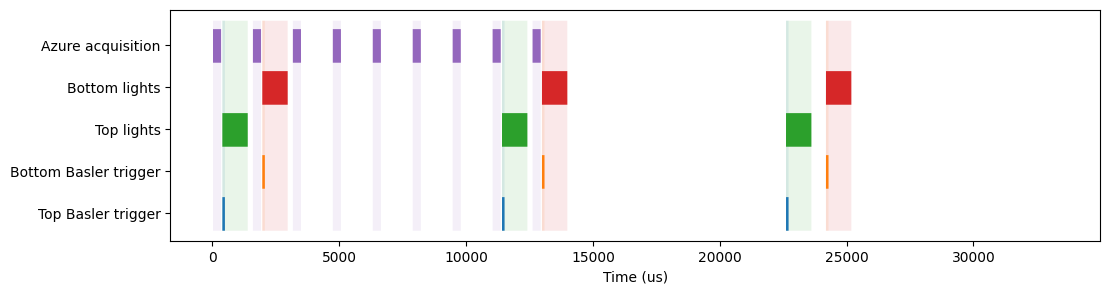

In [13]:
reset_loggers()

save_loc, first_video_file_name, full_config = refactor_acquire_video(
    tmp_path,
    full_config,
    recording_duration_s=rec_time_s,
    append_datetime=True,
    overwrite=False,
    logging_level=logging_level
)